In [23]:
import pandas as pd
import numpy as np


In [24]:
df = pd.read_csv("weatherAUS.csv")
x = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y = df.iloc[:,-1].values
y = y.reshape(-1,1)
x,y

(array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 'No'],
        ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 'No'],
        ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 'No'],
        ...,
        ['Uluru', 5.4, 26.9, ..., 12.5, 26.1, 'No'],
        ['Uluru', 7.8, 27.0, ..., 15.1, 26.0, 'No'],
        ['Uluru', 14.9, nan, ..., 15.0, 20.9, 'No']], dtype=object),
 array([['No'],
        ['No'],
        ['No'],
        ...,
        ['No'],
        ['No'],
        [nan]], dtype=object))

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
x = imputer.fit_transform(x)
y = imputer.fit_transform(y)
x,y

(array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 'No'],
        ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 'No'],
        ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 'No'],
        ...,
        ['Uluru', 5.4, 26.9, ..., 12.5, 26.1, 'No'],
        ['Uluru', 7.8, 27.0, ..., 15.1, 26.0, 'No'],
        ['Uluru', 14.9, 20.0, ..., 15.0, 20.9, 'No']], dtype=object),
 array([['No'],
        ['No'],
        ['No'],
        ...,
        ['No'],
        ['No'],
        ['No']], dtype=object))

In [26]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
x[:,0] = le1.fit_transform(x[:,0])

le2 = LabelEncoder()
x[:,4] = le2.fit_transform(x[:,4])

le3 = LabelEncoder()
x[:,6] = le3.fit_transform(x[:,6])

le4 = LabelEncoder()
x[:,7] = le4.fit_transform(x[:,7])

le5 = LabelEncoder()
x[:,-1] = le5.fit_transform(x[:,-1])

le6 = LabelEncoder()
y = le6.fit_transform(y)

/home/vincrusher/Documents/GitHub/PythonProgram/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
x,y

(array([[2, 13.4, 22.9, ..., 16.9, 21.8, 0],
        [2, 7.4, 25.1, ..., 17.2, 24.3, 0],
        [2, 12.9, 25.7, ..., 21.0, 23.2, 0],
        ...,
        [41, 5.4, 26.9, ..., 12.5, 26.1, 0],
        [41, 7.8, 27.0, ..., 15.1, 26.0, 0],
        [41, 14.9, 20.0, ..., 15.0, 20.9, 0]], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0]))

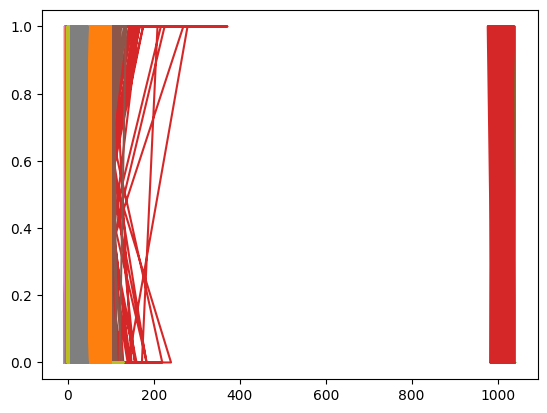

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y)

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.53166617,  0.19132753, -0.04135977, ..., -0.01407077,
         0.02310362, -0.52979545],
       [-1.53166617, -0.75105231,  0.26874452, ...,  0.03244663,
         0.387799  , -0.52979545],
       [-1.53166617,  0.11279588,  0.35331842, ...,  0.62166712,
         0.22733303, -0.52979545],
       ...,
       [ 1.20928479, -1.06517892,  0.52246622, ..., -0.69632607,
         0.65037966, -0.52979545],
       [ 1.20928479, -0.68822699,  0.53656187, ..., -0.29317521,
         0.63579185, -0.52979545],
       [ 1.20928479,  0.42692249, -0.45013361, ..., -0.30868102,
        -0.10818671, -0.52979545]])

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train,y_train

(array([[ 0.22535368,  1.03946939,  0.07140543, ...,  0.68369032,
          0.08145488, -0.52979545],
        [ 1.42012717, -0.45263203,  0.11369237, ..., -0.41722163,
          0.22733303, -0.52979545],
        [ 0.50647685, -0.20133073, -0.14002932, ..., -0.06058818,
         -0.02065982,  1.88752093],
        ...,
        [ 1.0687232 ,  0.75675544,  0.93124006, ...,  1.10234698,
          1.07342629, -0.52979545],
        [ 0.57675765, -0.04426743, -0.16822062, ...,  0.01694083,
         -0.28324049,  1.88752093],
        [ 1.63096955, -0.0285611 , -0.91529006, ..., -0.35519842,
         -0.76463838, -0.52979545]]),
 array([1, 0, 0, ..., 0, 0, 0]))

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier(n_estimators=150,random_state=0)
classifer.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [32]:
classifer.score(x_train,y_train)

0.9999398460057748

In [33]:
y_test

array([1, 1, 0, ..., 1, 0, 0])

In [34]:
y_pred = classifer.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
y_pred = le6.inverse_transform(y_pred)
y_pred 

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [36]:
y_test = le6.inverse_transform(y_test)
y_test

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [37]:
y_test = y_test.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

In [38]:
df = np.concatenate((y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=["Rain on Tommrrow","prediction of Rain"])
df,dataframe

(array([['Yes', 'No'],
        ['Yes', 'No'],
        ['No', 'No'],
        ...,
        ['Yes', 'No'],
        ['No', 'No'],
        ['No', 'No']], dtype=object),
       Rain on Tommrrow prediction of Rain
 0                  Yes                 No
 1                  Yes                 No
 2                   No                 No
 3                   No                Yes
 4                   No                 No
 ...                ...                ...
 29087               No                Yes
 29088               No                 No
 29089              Yes                 No
 29090               No                 No
 29091               No                 No
 
 [29092 rows x 2 columns])

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.8538086071772308

In [40]:
# dataframe.to_csv('prediction.csv')

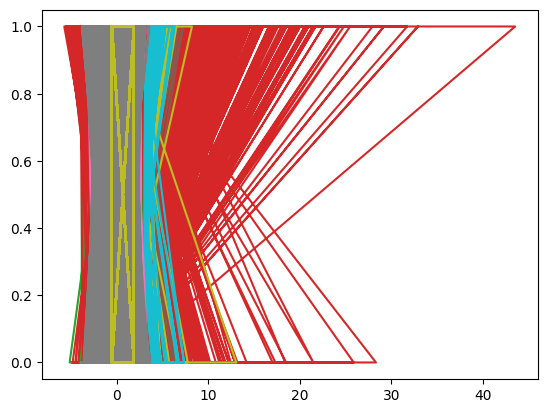

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train,y_train)